Net(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.2878]], requires_grad=True), Parameter containing:
tensor([-0.3365], requires_grad=True), Parameter containing:
tensor([[-0.5466],
        [ 0.9355],
        [ 0.3366],
        [-0.0104],
        [ 0.4866],
        [-0.6000],
        [ 0.8858],
        [ 0.7295],
        [ 0.2816],
        [ 0.3881],
        [ 0.3546],
        [-0.3229],
        [ 0.5079],
        [ 0.8498],
        [ 0.0599],
        [-0.8422],
        [-0.1250],
        [ 0.9881],
        [ 0.8194],
        [ 0.9439],
        [ 0.3264],
        [ 0.1192],
        [ 0.7464],
        [-0.9305],
        [-0.1394],
        [ 0.6685],
        [ 0.7580],
        [ 0.3039],
        [ 0.2896],
        [-0.4820]], requires_grad=True), Parameter containing:
tensor([-0.8609, -0.8045,  0.1439, -0.8980,  0.1200,  0.0

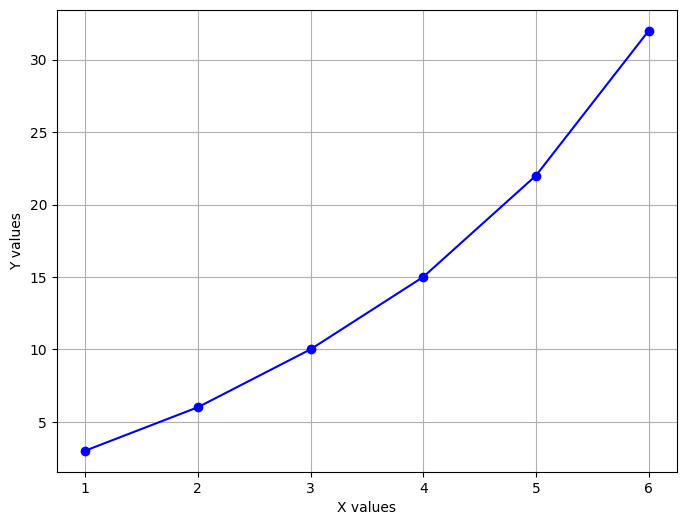

In [86]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1,bias=True)  # in dim, out dim
        self.fc2 = nn.Linear(1,30,bias=True)
        self.fc3 = nn.Linear(30,1,bias=True)
    def forward(self, x):
        x = F.elu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.elu(self.fc3(x))

        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


#optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.4)
optimizer = optim.Adam(net.parameters(), lr=0.01,amsgrad=True)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [87]:

# for epoch in range(60): # 0 - 19
#     for i in range(2):
#         batch = data[i*3:(i+1)*3]

#         X = [current_data[0] for current_data in batch]
#         Y = [current_data[1] for current_data in batch]
#         X, Y = torch.FloatTensor([X]).t(), torch.FloatTensor([Y])
#         optimizer.zero_grad()   
#         outputs = net(X)
#         loss = criterion(outputs, Y)
#         loss.backward()
#         optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
#     print("Epoch {} - loss: {}".format(epoch, loss))


# ### Test the trained network ###            
# for i, current_data in enumerate(data):
#     X, Y = current_data
#     X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
#     out = net(torch.FloatTensor(X))  
#     print("when x = {}, y = {}".format(X, out))
W = torch.tensor([10.0], requires_grad=True)
temp = torch.tensor([0.0])

for epoch in range(70000): # 0 - 190
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        
        optimizer.zero_grad()   
        outputs = net(X)
    
        temp = W.detach()    # Not to deliver the grad, but just value
        
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    print("Epoch {} - loss: {}".format(epoch, loss))


### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))

Epoch 0 - loss: 959.5111694335938
Epoch 1 - loss: 896.8638305664062
Epoch 2 - loss: 834.7538452148438
Epoch 3 - loss: 774.1187133789062
Epoch 4 - loss: 715.0774536132812
Epoch 5 - loss: 657.5227661132812
Epoch 6 - loss: 601.6572875976562
Epoch 7 - loss: 548.0818481445312
Epoch 8 - loss: 497.6570129394531
Epoch 9 - loss: 451.3021545410156
Epoch 10 - loss: 409.8005065917969
Epoch 11 - loss: 373.6474304199219
Epoch 12 - loss: 342.9803771972656
Epoch 13 - loss: 317.5877380371094
Epoch 14 - loss: 296.9797668457031
Epoch 15 - loss: 280.49432373046875
Epoch 16 - loss: 267.3977355957031
Epoch 17 - loss: 256.9606018066406
Epoch 18 - loss: 248.5043487548828
Epoch 19 - loss: 241.42453002929688
Epoch 20 - loss: 235.20431518554688
Epoch 21 - loss: 229.42811584472656
Epoch 22 - loss: 223.79580688476562
Epoch 23 - loss: 218.1299285888672
Epoch 24 - loss: 212.36587524414062
Epoch 25 - loss: 206.5226287841797
Epoch 26 - loss: 200.6638946533203
Epoch 27 - loss: 194.86155700683594
Epoch 28 - loss: 189.17

In [76]:
X

tensor([6.])

In [77]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
print(str(W.grad))

None


/var/folders/j7/kx6x4rd561158rgcc1cldfz00000gn/T/ipykernel_93514/1901091455.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(str(W.grad))
